**SI 670 Fall 2020 Kaggle Competition**

Please form teams of up to 4 students.  You should not collaborate with other teams, but you can talk to the GSIs if you are really stuck.  Please record you teams here:  https://docs.google.com/spreadsheets/d/1TDm_bwdSnENU8AMzxjvgqP2Fo3Poi3nRGr8dP1iIbqs/edit?usp=drive_web&ouid=109090332886082450282

For those who filled out the team survey and asked to be assigned to a team, you should find your name and your team members in the Google Sheet above. Please feel free to let us know if we missed you.

Give your team a fun and exciting name for the competition.  You only need one submission for the team.  Everyone on the team will get the same score.  


**Scoring**

There are two tasks, but they will be scored together.  It will be scored out of 100 points.  
You shall receive 40 points for a successful submission.  
You shall receive 20 additional points for attaining benchmark #1.
You shall receive 10 additional points for attaining benchmark #2.
You shall receive 30 * 2 / log2(2 + rank) additional “ranking points”.
The top five teams after the first evaluation will receive an additional 5 points.  

Note that, if you attain both benchmarks, you are guaranteed a score of 82.  The winning team will receive 108 points. 

The competition shall start Tuesday 10/20.

First evaluation is Monday 10/26 at 11:59pm  (only used for 5 bonus points)

Final evaluation is Monday 11/2 at 11:59 pm   

**Context**

Lake monitoring provides important information for environment protection and pollution identification, such as temperature/thermal monitoring. In this Kaggle task, we will provide thermal sensor data for multiple lakes and ask you to predict/estimate the temperature at a certain depth for certain lakes.

Content
We provide Lake Trout’s data during the period of Apr 20th, 2012 - Apr 19th, 2018.

For your reference, we also provide the data of six other lakes (ie., Bear Head, Carlos, Elk, Pearl, Shaokotan, White Iron). Please note that these datasets may vary in terms of the time window (yes, this is how real-world datasets look like!)

For each lake, there will be multiple sensors at different depths, and we will provide lake_id, time, depth and the corresponding temperature at this depth and time point. For example, for the Shaokotan Lake, you will see the following columns, with LakeId representing the lake identifier, Date_time representing the time stamp, Depth_m representing the depth in meters, and Water_Temp_C representing the temperature in Celsius.  Please note that the number of sensors are different across different lakes. 


**Task**

Predicting/estimating the temperature of Trout Lake at depth 10.5 m during Apr 20th, 2018 - Apr 19th, 2019. Please feel free to use part of/all the data we provide. 

Benchmark 1:  MSE < 0.065
Benchmark 2:  MSE < 0.032

Files for first task
For the first task, we will provide you a file Trout_training.csv under the Trout folder which contains all the sensors in the Trout Lake as training. Besides, we will give you another Trout_testing_features.csv under the Trout folder which contains all other sensors’ temperature (except the depth 10.5’s temperature). 

We hope you return a file named Trout_prediction.csv, the dataset you return and upload should have two columns: Date_Time and Water_Temp_C, with a shape of 8,760 * 2. (Reason for 8,760: 8,760 =  365 days * 24 sensorings/day) You are supposed to predict every hour’s temperature of depth-10.5 sensor during  Apr 20th, 2018 - Apr 19th, 2019. 

**Link** 
https://www.kaggle.com/c/si670fall2020/overview


## Task 1

In [40]:
import pandas as pd
import numpy as py

df_trout = pd.read_csv('Trout_training.csv')
df_trout.head(10)

,Date_Time,Water_Temp_C,Depth_m
0,2012-04-20 00:00:00,5.257,1.5
1,2012-04-20 00:00:00,5.257,2.5
2,2012-04-20 00:00:00,5.257,3.5
3,2012-04-20 00:00:00,5.205,4.5
4,2012-04-20 00:00:00,5.205,5.5
5,2012-04-20 00:00:00,5.154,6.5
6,2012-04-20 00:00:00,5.231,7.5
7,2012-04-20 00:00:00,5.128,8.5
8,2012-04-20 00:00:00,5.102,9.5
9,2012-04-20 00:00:00,5.076,10.5


In [41]:
df_trout_105 = df_trout[df_trout['Depth_m']==10.5]

In [2]:
#Check if there's any missing values
for c in df_trout.columns:
    print(df_trout[c].isnull().values.any())

False
False
False


**Comments:**

No missing values at all

In [3]:
#Check for outliers/anomalies
for c in df_trout.columns:
    print(c,':')
    print(df_trout[c].unique())

df_trout.describe()

Date_Time :
['2012-04-20 00:00:00' '2012-04-20 01:00:00' '2012-04-20 02:00:00' ...
 '2018-04-19 21:00:00' '2018-04-19 22:00:00' '2018-04-19 23:00:00']
Water_Temp_C :
[5.257 5.205 5.154 ... 0.439 0.356 0.273]
Depth_m :
[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 14.5 16.5
 18.5 20.5]


,Water_Temp_C,Depth_m
count,839215.000000,839215.000000
mean,6.336614,9.628875
std,5.591335,5.557104
min,0.273000,1.500000
25%,1.994000,4.500000
50%,5.050000,9.500000
75%,8.245000,14.500000
max,25.768000,20.500000


**Comments:**

Doesn't seem like there are any outliers or values that doesn't belong

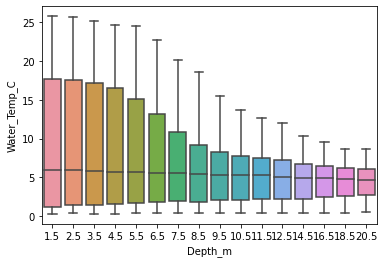

In [4]:
import seaborn as sns

#Examine depth vs temp
ax = sns.boxplot(x="Depth_m", y="Water_Temp_C", data=df_trout)


**Comments:**

It seems like the water temperature slightly goes down in general as the depth increases. But the variance in temperature varies greatly when the depth increases. Need to be aware of the issue of heteroskedasticity when fitting a regression line(possible solution: Generalized Linear Method). Reminder to check residues.

In [27]:
#Extract Year out of Date_Time
year = pd.DatetimeIndex(df_trout_105['Date_Time']).year
df_trout_105['Year'] = year

#Extract Month out of Date_Time
month = pd.DatetimeIndex(df_trout_105['Date_Time']).month
df_trout_105['Month'] = month

#Extract Hour out of Date_Time
hour = pd.DatetimeIndex(df_trout_105['Date_Time']).hour
df_trout_105['Hour'] = hour

#Extract Weekday out of Date_Time
weekdays = pd.DatetimeIndex(df_trout_105['Date_Time']).weekday #Monday 0, Sunday 6
df_trout_105['Weekday'] = weekdays


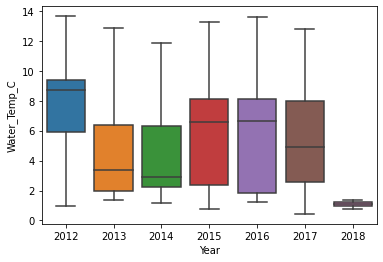

In [7]:
#Examine relationship between year and water temperature
ax = sns.boxplot(x="Year", y="Water_Temp_C", data=df_trout_105)


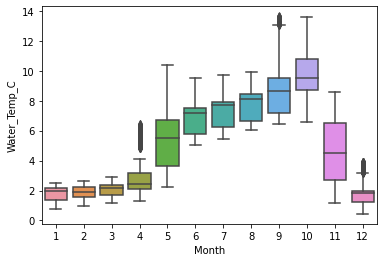

In [8]:
#Examine relationship between month and water temperature
ax = sns.boxplot(x="Month", y="Water_Temp_C", data=df_trout_105)


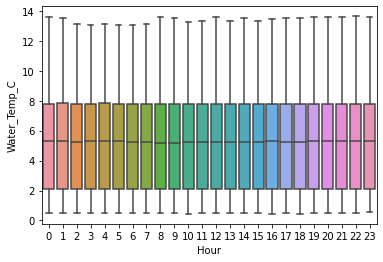

In [9]:
#Examine relationship between hour and water temperature
ax = sns.boxplot(x="Hour", y="Water_Temp_C", data=df_trout_105)


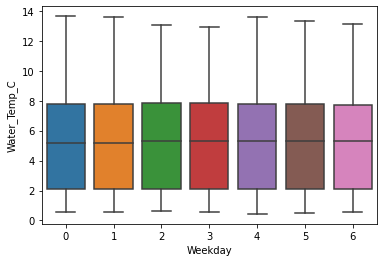

In [10]:
#Examine relationship between weekday and water temperature

ax = sns.boxplot(x="Weekday", y="Water_Temp_C", data=df_trout_105)

**Comments:** 

Weekday and Hour doesn't show any correlation with the water temperature. Month has strong correlation as we can see the temperature raises up during the summer and goes down in winter. There are also some notable differences between the years.

In [7]:
#Training the Model

# Run a linear regression to see the fit
import statsmodels.formula.api as smf

res = smf.ols(formula = 'Water_Temp_C  ~ Year + Month + Hour + Weekday', data = df_trout_105).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Water_Temp_C   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     3271.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:05:18   Log-Likelihood:            -1.2822e+05
No. Observations:               52508   AIC:                         2.565e+05
Df Residuals:                   52503   BIC:                         2.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    295.5903     14.138     20.908      0.000     267.880     323.301
Year          -0.1454      0.007    -20.732      0.000      -0.159      -0.132
Month          0.3810      0.004    105.856      0.000       0.374       0.388
Hour        1.758e-05      0.002      0.010      0.992      -0.003       0.003
Weekday       -0.0021      0.006     -0.342      0.732      -0.014       0.010
==============================================================================
Omnibus:                     1511.909   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1317.407
Skew:                          -0.327   Prob(JB):                    8.49e-287
Kurtosis:                       2.583   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[('Jarque-Bera', 1317.4071173277887),
 ('Chi^2 two-tail prob.', 8.485535647045741e-287),
 ('Skew', -0.327083918397504),
 ('Kurtosis', 2.5826081714744804)]

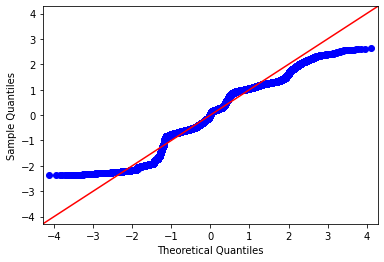

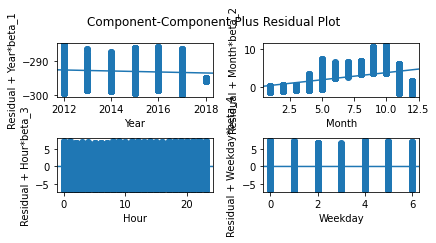

In [8]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.compat import lzip

#Normality assumption
fig = sm.qqplot(res.resid,stats.t, fit=True, line="45")

fig = sm.graphics.plot_ccpr_grid(res)
fig.tight_layout(pad=1.0)

# Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res.resid)
lzip(name, test)


Text(0, 0.5, 'residuals')

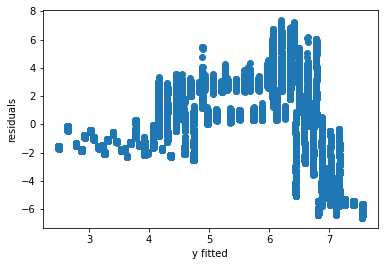

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

mpl.rcParams['agg.path.chunksize'] = 1000

plt.scatter(res.fittedvalues.values, res.resid)
plt.xlabel("y fitted")
plt.ylabel("residuals")


**Comments:**

Since the time and depth are ordinal data here, it doesn't make sense to turn into one hot encoding.Keep using them as numeric value.

All three variables are significant. However R squared is only 0.19. This is because the residuals of the regression violated the assumptions of normality (High jarque bera value and QQplot with heavy tails also confirmed this). We can see the residual follows a seasonal pattern with month and having heteroskedasticity with depth. Therefore a simple regression model with or without penalty term won't fit for this task.


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_trout_105 = df_trout_105[['Date_Time','Water_Temp_C']]
df_trout_105.Date_Time = pd.to_datetime(df_trout_105.Date_Time)
df_trout_105 = df_trout_105.set_index("Date_Time")

train_data, test_data = train_test_split(df_trout_105,test_size = 0.2, random_state=0)

scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)


In [45]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
25270/41994 [=================>............] - ETA: 6:56 - loss: 0.2177

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);